In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [28]:
df = pd.read_csv('retails.csv',index_col='Order Date',parse_dates=True)
df.index.freq='MS'

In [29]:
df.head()

,Unnamed: 0,Sales
Order Date,,
2015-01-01,0,122497
2015-02-01,1,66030
2015-03-01,2,247156
2015-04-01,3,203258
2015-05-01,4,164263


In [30]:
df = df.drop(df.columns[[0]], axis=1)

In [31]:
df

,Sales
Order Date,
2015-01-01,122497
2015-02-01,66030
2015-03-01,247156
2015-04-01,203258
2015-05-01,164263
2015-06-01,206064
2015-07-01,220986
2015-08-01,230161
2015-09-01,382200


<Axes: xlabel='Order Date'>

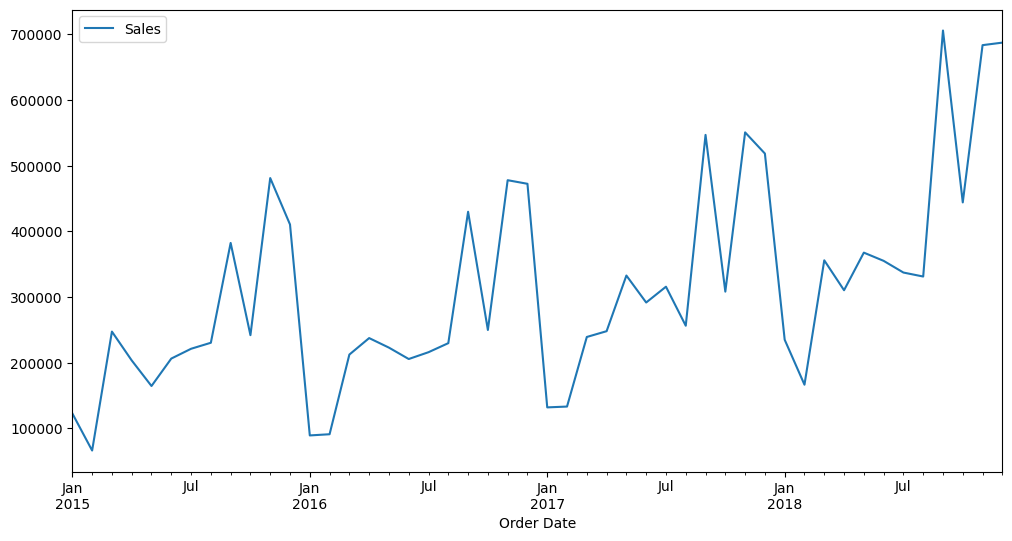

In [32]:
df.plot(figsize=(12,6))

In [33]:
from statsmodels.tsa.seasonal import seasonal_decompose

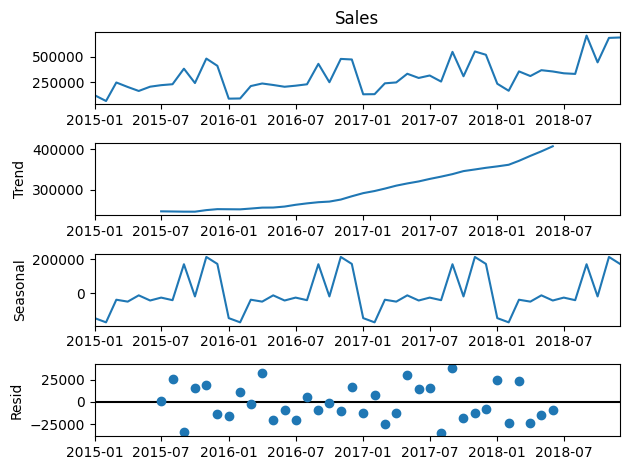

In [34]:
results = seasonal_decompose(df['Sales'])
results.plot();

In [35]:
len(df)

48

In [36]:
train = df.iloc[:36]
test = df.iloc[36:]

In [37]:
train.head()

,Sales
Order Date,
2015-01-01,122497
2015-02-01,66030
2015-03-01,247156
2015-04-01,203258
2015-05-01,164263


In [38]:
test.head()

,Sales
Order Date,
2018-01-01,234739
2018-02-01,166267
2018-03-01,355704
2018-04-01,310150
2018-05-01,367411


In [39]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [40]:
df.head()

,Sales
Order Date,
2015-01-01,122497
2015-02-01,66030
2015-03-01,247156
2015-04-01,203258
2015-05-01,164263


In [41]:
df.tail()

,Sales
Order Date,
2018-08-01,331014
2018-09-01,705680
2018-10-01,443898
2018-11-01,683410
2018-12-01,687245


In [42]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [43]:
scaled_train[:10]

array([[0.1165395 ],
       [0.        ],
       [0.37381716],
       [0.2832182 ],
       [0.20273832],
       [0.28900937],
       [0.31980616],
       [0.338742  ],
       [0.65252791],
       [0.36261044]])

In [44]:
scaled_test[:]

array([[0.34819031],
       [0.20687428],
       [0.5978441 ],
       [0.50382741],
       [0.62200561],
       [0.59618889],
       [0.5594317 ],
       [0.54688761],
       [1.32014257],
       [0.77986341],
       [1.2741806 ],
       [1.28209547]])

In [45]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [46]:
# define generator
n_input = 12
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [47]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.1165395  0.         0.37381716 0.2832182  0.20273832 0.28900937
 0.31980616 0.338742   0.65252791 0.36261044 0.85639309 0.71047879]
Predict this y: 
 [[0.04742524]]


In [48]:
X.shape

(1, 12, 1)

In [49]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [50]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [51]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40901 (159.77 KB)
Trainable params: 40901 (159.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [52]:
# fit model
model.fit(generator,epochs=50)

Epoch 1/50
24/24 [==============================] - 1s 3ms/step - loss: 0.1891
Epoch 2/50
24/24 [==============================] - 0s 3ms/step - loss: 0.0730
Epoch 3/50
24/24 [==============================] - 0s 3ms/step - loss: 0.0906
Epoch 4/50
24/24 [==============================] - 0s 4ms/step - loss: 0.0910
Epoch 5/50
24/24 [==============================] - 0s 3ms/step - loss: 0.0835
Epoch 6/50
24/24 [==============================] - 0s 3ms/step - loss: 0.0730
Epoch 7/50
24/24 [==============================] - 0s 3ms/step - loss: 0.0706
Epoch 8/50
24/24 [==============================] - 0s 3ms/step - loss: 0.0729
Epoch 9/50
24/24 [==============================] - 0s 3ms/step - loss: 0.0756
Epoch 10/50
24/24 [==============================] - 0s 3ms/step - loss: 0.0738
Epoch 11/50
24/24 [==============================] - 0s 4ms/step - loss: 0.0716
Epoch 12/50
24/24 [==============================] - 0s 3ms/step - loss: 0.0764
Epoch 13/50
24/24 [==============================

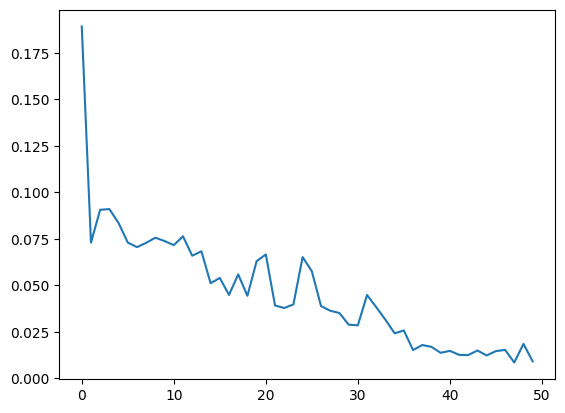

In [53]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [54]:
last_train_batch = scaled_train[-12:]

In [55]:
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [56]:
model.predict(last_train_batch)

1/1 [==============================] - 0s 133ms/step


array([[0.27165887]], dtype=float32)

In [57]:
scaled_test[0]

array([0.34819031])

In [58]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 16ms/step


In [59]:
test_predictions

[array([0.27165887], dtype=float32),
 array([0.34524995], dtype=float32),
 array([0.44282085], dtype=float32),
 array([0.49872002], dtype=float32),
 array([0.6492265], dtype=float32),
 array([0.6179803], dtype=float32),
 array([0.6954515], dtype=float32),
 array([0.7395639], dtype=float32),
 array([1.2752374], dtype=float32),
 array([0.8408906], dtype=float32),
 array([1.2667137], dtype=float32),
 array([1.0884885], dtype=float32)]

In [60]:
test.head()

,Sales
Order Date,
2018-01-01,234739
2018-02-01,166267
2018-03-01,355704
2018-04-01,310150
2018-05-01,367411


In [61]:
true_predictions = scaler.inverse_transform(test_predictions)

In [62]:
test['Predictions'] = true_predictions

C:\Users\irfan\AppData\Local\Temp\ipykernel_13456\4269337381.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


<Axes: xlabel='Order Date'>

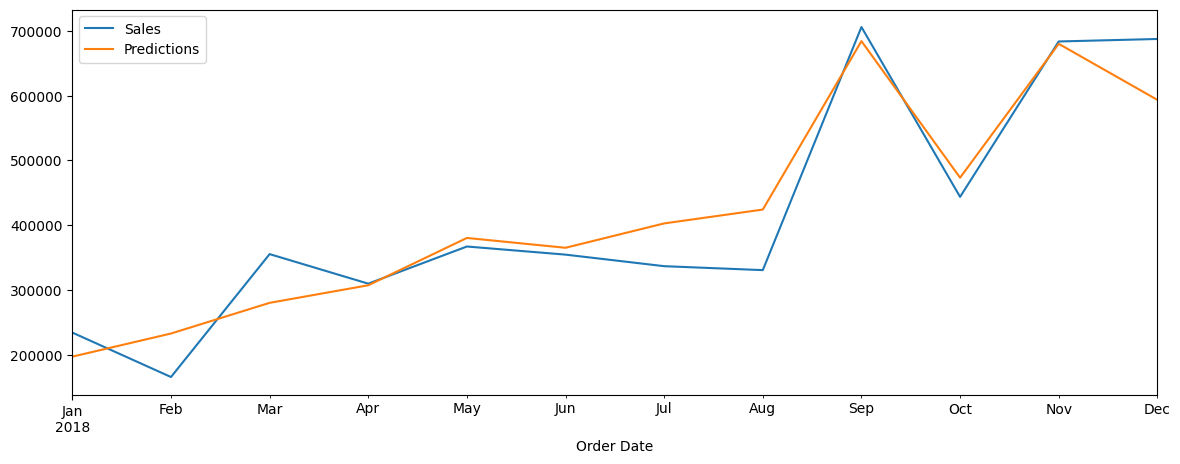

In [63]:
test.plot(figsize=(14,5))

In [65]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['Sales'],test['Predictions']))
print(rmse)

54024.80322554375


In [66]:
last_train_batch

array([[[0.13558885],
        [0.13817898],
        [0.35689357],
        [0.37509055],
        [0.55000402],
        [0.46524165],
        [0.514933  ],
        [0.39225354],
        [0.99208926],
        [0.49944379],
        [1.        ],
        [0.93343254]]])

In [67]:
scaled_train[-12:]

array([[0.13558885],
       [0.13817898],
       [0.35689357],
       [0.37509055],
       [0.55000402],
       [0.46524165],
       [0.514933  ],
       [0.39225354],
       [0.99208926],
       [0.49944379],
       [1.        ],
       [0.93343254]])